In [1]:
import stlearn as st
from pathlib import Path
import pandas as pd
import sys

In [2]:
file = Path("../stimage").resolve()
parent= file.parent
sys.path.append(str(parent))

In [3]:
from stimage.utils import gene_plot, Read10X, ReadOldST, negative_binomial_layer, negative_binomial_loss

In [4]:
BASE_PATH = Path("/scratch/imb/Xiao/unet")
TILE_PATH = BASE_PATH / "tiles"
TILE_PATH.mkdir(parents=True, exist_ok=True)

In [5]:
SAMPLE = "Sample1"
Sample1 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample1_features = pd.read_csv(BASE_PATH / ("features/train/"+SAMPLE+".csv"), index_col=0)
Sample1.obs["f_index"] = Sample1.obs["imagerow"].astype(str) + "-" + Sample1.obs["imagecol"].astype(str)
Sample1_features = Sample1_features.reindex(Sample1.obs["f_index"])
Sample1_features.index = Sample1.obs_names
Sample1.obsm["features"] = Sample1_features

Added tissue image to the object!


In [6]:
SAMPLE = "Sample2"
Sample2 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample2_features = pd.read_csv(BASE_PATH / ("features/train/"+SAMPLE+".csv"), index_col=0)
Sample2.obs["f_index"] = Sample2.obs["imagerow"].astype(str) + "-" + Sample2.obs["imagecol"].astype(str)
Sample2_features = Sample2_features.reindex(Sample2.obs["f_index"])
Sample2_features.index = Sample2.obs_names
Sample2.obsm["features"] = Sample2_features

Added tissue image to the object!


In [7]:
SAMPLE = "Sample3"
Sample3 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample3_features = pd.read_csv(BASE_PATH / ("features/train/"+SAMPLE+".csv"), index_col=0)
Sample3.obs["f_index"] = Sample3.obs["imagerow"].astype(str) + "-" + Sample3.obs["imagecol"].astype(str)
Sample3_features = Sample3_features.reindex(Sample3.obs["f_index"])
Sample3_features.index = Sample3.obs_names
Sample3.obsm["features"] = Sample3_features

Added tissue image to the object!


In [8]:
SAMPLE = "Sample4"
Sample4 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample4_features = pd.read_csv(BASE_PATH / ("features/valid/"+SAMPLE+".csv"), index_col=0)
Sample4.obs["f_index"] = Sample4.obs["imagerow"].astype(str) + "-" + Sample4.obs["imagecol"].astype(str)
Sample4_features = Sample4_features.reindex(Sample4.obs["f_index"])
Sample4_features.index = Sample4.obs_names
Sample4.obsm["features"] = Sample4_features

Added tissue image to the object!


In [9]:
SAMPLE = "Sample5"
Sample5 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample5_features = pd.read_csv(BASE_PATH / ("features/test/"+SAMPLE+".csv"), index_col=0)
Sample5.obs["f_index"] = Sample5.obs["imagerow"].astype(str) + "-" + Sample5.obs["imagecol"].astype(str)
Sample5_features = Sample5_features.reindex(Sample5.obs["f_index"])
Sample5_features.index = Sample5.obs_names
Sample5.obsm["features"] = Sample5_features

Added tissue image to the object!


In [10]:
SAMPLE = "Sample6"
Sample6 = ReadOldST(count_matrix_file=BASE_PATH / ("count_data/JVQN_Brain_"+SAMPLE[-1]+"_S"+SAMPLE[-1]+"_stdata.tsv"),
                    spatial_file=BASE_PATH / ("spot_info/spot_data-selection-CY3_"+SAMPLE+"_all.tsv"),
                    image_file=BASE_PATH / ("images/HE_"+SAMPLE+".jpg"),
                    library_id=SAMPLE)
Sample6_features = pd.read_csv(BASE_PATH / ("features/test/"+SAMPLE+".csv"), index_col=0)
Sample6.obs["f_index"] = Sample6.obs["imagerow"].astype(str) + "-" + Sample6.obs["imagecol"].astype(str)
Sample6_features = Sample6_features.reindex(Sample6.obs["f_index"])
Sample6_features.index = Sample6.obs_names
Sample6.obsm["features"] = Sample6_features

Added tissue image to the object!


In [12]:
# Plp1 Aqp4 ERMN Apold1 Ccl4 Reln Pdgfra Dsp
gene_list=["ENSMUSG00000031425", "ENSMUSG00000024411", "ENSMUSG00000026830", 
           "ENSMUSG00000090698", "ENSMUSG00000018930", "ENSMUSG00000042453",
           "ENSMUSG00000029231", "ENSMUSG00000054889"]
gene = gene_list[0]

In [13]:
for adata in [
    Sample1,
    Sample2,
    Sample3,
    Sample4,
    Sample5,
    Sample6,
]:
#     count_df = adata.to_df()
#     count_df[count_df <=1] = 0
#     count_df[count_df >1] = 1
#     adata.X = count_df
#     adata[:,gene_list]
#     st.pp.filter_genes(adata,min_cells=1)
#     st.pp.normalize_total(adata)
#     st.pp.log1p(adata)
#     st.pp.scale(adata)

    # pre-processing for spot image
    st.pp.tiling(adata, TILE_PATH, crop_size=40)
    st.pp.extract_feature(adata)
    
    
    

Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]


The morphology feature is added to adata.obsm['X_morphology']!


Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]


The morphology feature is added to adata.obsm['X_morphology']!


Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]


The morphology feature is added to adata.obsm['X_morphology']!


Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]


The morphology feature is added to adata.obsm['X_morphology']!


Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]


The morphology feature is added to adata.obsm['X_morphology']!


Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]


The morphology feature is added to adata.obsm['X_morphology']!


In [14]:
Sample1

AnnData object with n_obs × n_vars = 640 × 22108
    obs: 'imagecol', 'imagerow', 'sum_counts', 'f_index', 'tile_path'
    uns: 'spatial'
    obsm: 'spatial', 'features', 'X_tile_feature', 'X_morphology'

In [15]:
training_dataset = Sample1.concatenate(
    [Sample2, Sample3],
    batch_key="library_id",
    uns_merge="unique",
    batch_categories=[
        k
        for d in [
            Sample1.uns["spatial"],
            Sample2.uns["spatial"],
            Sample3.uns["spatial"],
        ]
        for k in [list(d.keys())[0]]
    ],
)

In [16]:
valid_dataset = Sample4.copy()

In [17]:
test_dataset = Sample5.concatenate(
    [Sample6],
    batch_key="library_id",
    uns_merge="unique",
    batch_categories=[
        k
        for d in [
            Sample5.uns["spatial"],
            Sample6.uns["spatial"],
        ]
        for k in [list(d.keys())[0]]
    ],
)

In [197]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,200))

In [198]:
train_X = training_dataset.obsm["X_tile_feature"]
train_Y = scaler.fit_transform(training_dataset[:,gene].to_df())

In [199]:
valid_X = valid_dataset.obsm["X_tile_feature"]
valid_Y = scaler.fit_transform(valid_dataset[:,gene].to_df())

In [200]:
test_X = test_dataset.obsm["X_tile_feature"]
test_Y = scaler.fit_transform(test_dataset[:,gene].to_df())

In [201]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Lambda, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
print(tf.__version__)

2.2.0


# cnn + linear

In [265]:
def build_model():
    inputs = Input(shape=(2048,))
#     outputs = Dropout(0.6)(inputs)
#     outputs = Dense(512,)(outputs)
#     outputs = Dense(256, activation='relu')(inputs)
#     outputs = Dropout(0.5)(outputs)
    outputs = Dense(1, activation='linear')(inputs)
    
    model = Model(inputs=inputs, outputs=outputs)

    optimizer = tf.keras.optimizers.RMSprop(0.0001)
#     optimizer = tf.keras.optimizers.Adam()

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
    return model

In [266]:
model = build_model()

In [267]:
EPOCHS = 500

history = model.fit(
  train_X, train_Y, batch_size=100,
  epochs=EPOCHS, validation_data = (valid_X, valid_Y), validation_batch_size = 100)

Epoch 1/500
20/20 [==============================] - ETA: 0s - loss: 994.8414 - mse: 994.841 - 0s 7ms/step - loss: 1029.2367 - mse: 1029.2367 - val_loss: 1919.0209 - val_mse: 1919.0211
Epoch 2/500
20/20 [==============================] - ETA: 0s - loss: 1148.3009 - mse: 1148.300 - 0s 3ms/step - loss: 1000.6900 - mse: 1000.6899 - val_loss: 1883.1896 - val_mse: 1883.1896
Epoch 3/500
20/20 [==============================] - ETA: 0s - loss: 1131.1603 - mse: 1131.160 - 0s 4ms/step - loss: 976.3065 - mse: 976.3065 - val_loss: 1850.7153 - val_mse: 1850.7153
Epoch 4/500
20/20 [==============================] - ETA: 0s - loss: 1219.5594 - mse: 1219.559 - 0s 3ms/step - loss: 953.9572 - mse: 953.9572 - val_loss: 1820.4167 - val_mse: 1820.4167
Epoch 5/500
20/20 [==============================] - ETA: 0s - loss: 1095.3883 - mse: 1095.388 - 0s 3ms/step - loss: 933.1931 - mse: 933.1929 - val_loss: 1790.6343 - val_mse: 1790.6343
Epoch 6/500
20/20 [==============================] - ETA: 0s - loss: 1529

20/20 [==============================] - ETA: 0s - loss: 377.7428 - mse: 377.742 - 0s 2ms/step - loss: 612.3873 - mse: 612.3873 - val_loss: 1241.2336 - val_mse: 1241.2335
Epoch 46/500
20/20 [==============================] - ETA: 0s - loss: 556.3236 - mse: 556.323 - 0s 2ms/step - loss: 609.0517 - mse: 609.0517 - val_loss: 1236.0034 - val_mse: 1236.0035
Epoch 47/500
20/20 [==============================] - ETA: 0s - loss: 579.3356 - mse: 579.335 - 0s 2ms/step - loss: 605.8405 - mse: 605.8405 - val_loss: 1230.9824 - val_mse: 1230.9824
Epoch 48/500
20/20 [==============================] - ETA: 0s - loss: 388.3277 - mse: 388.327 - 0s 2ms/step - loss: 602.6399 - mse: 602.6399 - val_loss: 1225.3165 - val_mse: 1225.3165
Epoch 49/500
20/20 [==============================] - ETA: 0s - loss: 622.5268 - mse: 622.526 - 0s 2ms/step - loss: 599.4705 - mse: 599.4705 - val_loss: 1220.1372 - val_mse: 1220.1372
Epoch 50/500
20/20 [==============================] - ETA: 0s - loss: 368.7986 - mse: 368.798

Epoch 90/500
20/20 [==============================] - ETA: 0s - loss: 725.0829 - mse: 725.082 - 0s 2ms/step - loss: 510.2338 - mse: 510.2338 - val_loss: 1076.3824 - val_mse: 1076.3824
Epoch 91/500
20/20 [==============================] - ETA: 0s - loss: 347.5777 - mse: 347.577 - 0s 2ms/step - loss: 508.7205 - mse: 508.7205 - val_loss: 1073.4062 - val_mse: 1073.4062
Epoch 92/500
20/20 [==============================] - ETA: 0s - loss: 361.4152 - mse: 361.415 - 0s 2ms/step - loss: 507.2091 - mse: 507.2091 - val_loss: 1071.1127 - val_mse: 1071.1127
Epoch 93/500
20/20 [==============================] - ETA: 0s - loss: 561.9044 - mse: 561.904 - 0s 2ms/step - loss: 505.7963 - mse: 505.7963 - val_loss: 1069.1298 - val_mse: 1069.1298
Epoch 94/500
20/20 [==============================] - ETA: 0s - loss: 633.2288 - mse: 633.228 - 0s 2ms/step - loss: 504.4062 - mse: 504.4062 - val_loss: 1066.6350 - val_mse: 1066.6350
Epoch 95/500
20/20 [==============================] - ETA: 0s - loss: 692.2141 -

20/20 [==============================] - ETA: 0s - loss: 290.4395 - mse: 290.439 - 0s 3ms/step - loss: 460.8661 - mse: 460.8661 - val_loss: 998.7112 - val_mse: 998.7112
Epoch 135/500
20/20 [==============================] - ETA: 0s - loss: 490.1985 - mse: 490.198 - 0s 3ms/step - loss: 460.0668 - mse: 460.0668 - val_loss: 997.3115 - val_mse: 997.3115
Epoch 136/500
20/20 [==============================] - ETA: 0s - loss: 438.5276 - mse: 438.527 - 0s 3ms/step - loss: 459.3059 - mse: 459.3059 - val_loss: 996.2386 - val_mse: 996.2386
Epoch 137/500
20/20 [==============================] - ETA: 0s - loss: 424.9067 - mse: 424.906 - 0s 2ms/step - loss: 458.5124 - mse: 458.5124 - val_loss: 995.1754 - val_mse: 995.1754
Epoch 138/500
20/20 [==============================] - ETA: 0s - loss: 591.1559 - mse: 591.155 - 0s 3ms/step - loss: 457.7205 - mse: 457.7205 - val_loss: 993.7779 - val_mse: 993.7779
Epoch 139/500
20/20 [==============================] - ETA: 0s - loss: 467.5854 - mse: 467.585 - 0s

Epoch 179/500
20/20 [==============================] - ETA: 0s - loss: 580.1923 - mse: 580.192 - 0s 2ms/step - loss: 432.0893 - mse: 432.0893 - val_loss: 953.3254 - val_mse: 953.3254
Epoch 180/500
20/20 [==============================] - ETA: 0s - loss: 226.1457 - mse: 226.145 - 0s 2ms/step - loss: 431.6035 - mse: 431.6035 - val_loss: 952.7350 - val_mse: 952.7350
Epoch 181/500
20/20 [==============================] - ETA: 0s - loss: 674.9398 - mse: 674.939 - 0s 3ms/step - loss: 431.1106 - mse: 431.1106 - val_loss: 952.0469 - val_mse: 952.0469
Epoch 182/500
20/20 [==============================] - ETA: 0s - loss: 335.3765 - mse: 335.376 - 0s 2ms/step - loss: 430.6501 - mse: 430.6501 - val_loss: 951.5921 - val_mse: 951.5921
Epoch 183/500
20/20 [==============================] - ETA: 0s - loss: 546.8698 - mse: 546.869 - 0s 2ms/step - loss: 430.1426 - mse: 430.1426 - val_loss: 951.1772 - val_mse: 951.1772
Epoch 184/500
20/20 [==============================] - ETA: 0s - loss: 458.1653 - mse

Epoch 224/500
20/20 [==============================] - ETA: 0s - loss: 477.1230 - mse: 477.123 - 0s 2ms/step - loss: 413.9015 - mse: 413.9015 - val_loss: 927.1612 - val_mse: 927.1612
Epoch 225/500
20/20 [==============================] - ETA: 0s - loss: 574.2963 - mse: 574.296 - 0s 3ms/step - loss: 413.5962 - mse: 413.5962 - val_loss: 926.9733 - val_mse: 926.9733
Epoch 226/500
20/20 [==============================] - ETA: 0s - loss: 287.3477 - mse: 287.347 - 0s 2ms/step - loss: 413.2400 - mse: 413.2400 - val_loss: 926.2383 - val_mse: 926.2383
Epoch 227/500
20/20 [==============================] - ETA: 0s - loss: 396.2326 - mse: 396.232 - 0s 3ms/step - loss: 412.9228 - mse: 412.9228 - val_loss: 926.1984 - val_mse: 926.1984
Epoch 228/500
20/20 [==============================] - ETA: 0s - loss: 272.4028 - mse: 272.402 - 0s 2ms/step - loss: 412.5794 - mse: 412.5794 - val_loss: 925.4118 - val_mse: 925.4118
Epoch 229/500
20/20 [==============================] - ETA: 0s - loss: 322.4547 - mse

Epoch 269/500
20/20 [==============================] - ETA: 0s - loss: 473.2634 - mse: 473.263 - 0s 2ms/step - loss: 400.6375 - mse: 400.6375 - val_loss: 909.3709 - val_mse: 909.3709
Epoch 270/500
20/20 [==============================] - ETA: 0s - loss: 382.7105 - mse: 382.710 - 0s 2ms/step - loss: 400.3775 - mse: 400.3775 - val_loss: 908.9457 - val_mse: 908.9457
Epoch 271/500
20/20 [==============================] - ETA: 0s - loss: 428.5060 - mse: 428.506 - 0s 2ms/step - loss: 400.1384 - mse: 400.1385 - val_loss: 908.4811 - val_mse: 908.4811
Epoch 272/500
20/20 [==============================] - ETA: 0s - loss: 412.8565 - mse: 412.856 - 0s 3ms/step - loss: 399.8629 - mse: 399.8629 - val_loss: 907.9861 - val_mse: 907.9861
Epoch 273/500
20/20 [==============================] - ETA: 0s - loss: 357.4490 - mse: 357.449 - 0s 2ms/step - loss: 399.6068 - mse: 399.6068 - val_loss: 907.4194 - val_mse: 907.4194
Epoch 274/500
20/20 [==============================] - ETA: 0s - loss: 547.4549 - mse

Epoch 314/500
20/20 [==============================] - ETA: 0s - loss: 915.2385 - mse: 915.238 - 0s 2ms/step - loss: 390.2550 - mse: 390.2550 - val_loss: 896.1350 - val_mse: 896.1350
Epoch 315/500
20/20 [==============================] - ETA: 0s - loss: 257.4818 - mse: 257.481 - 0s 2ms/step - loss: 390.0503 - mse: 390.0503 - val_loss: 896.3937 - val_mse: 896.3937
Epoch 316/500
20/20 [==============================] - ETA: 0s - loss: 282.6313 - mse: 282.631 - 0s 2ms/step - loss: 389.8510 - mse: 389.8510 - val_loss: 896.2485 - val_mse: 896.2485
Epoch 317/500
20/20 [==============================] - ETA: 0s - loss: 484.6393 - mse: 484.639 - 0s 2ms/step - loss: 389.6370 - mse: 389.6370 - val_loss: 896.1658 - val_mse: 896.1658
Epoch 318/500
20/20 [==============================] - ETA: 0s - loss: 210.4233 - mse: 210.423 - 0s 2ms/step - loss: 389.4238 - mse: 389.4238 - val_loss: 895.7925 - val_mse: 895.7925
Epoch 319/500
20/20 [==============================] - ETA: 0s - loss: 314.5740 - mse

Epoch 359/500
20/20 [==============================] - ETA: 0s - loss: 347.7219 - mse: 347.721 - 0s 3ms/step - loss: 381.6299 - mse: 381.6299 - val_loss: 887.4765 - val_mse: 887.4765
Epoch 360/500
20/20 [==============================] - ETA: 0s - loss: 258.1935 - mse: 258.193 - 0s 3ms/step - loss: 381.4499 - mse: 381.4499 - val_loss: 887.4729 - val_mse: 887.4729
Epoch 361/500
20/20 [==============================] - ETA: 0s - loss: 536.5314 - mse: 536.531 - 0s 2ms/step - loss: 381.2792 - mse: 381.2792 - val_loss: 887.3596 - val_mse: 887.3596
Epoch 362/500
20/20 [==============================] - ETA: 0s - loss: 298.5970 - mse: 298.597 - 0s 2ms/step - loss: 381.1101 - mse: 381.1101 - val_loss: 887.4500 - val_mse: 887.4500
Epoch 363/500
20/20 [==============================] - ETA: 0s - loss: 349.0348 - mse: 349.034 - 0s 3ms/step - loss: 380.9128 - mse: 380.9128 - val_loss: 887.4868 - val_mse: 887.4868
Epoch 364/500
20/20 [==============================] - ETA: 0s - loss: 276.8307 - mse

Epoch 404/500
20/20 [==============================] - ETA: 0s - loss: 153.8592 - mse: 153.859 - 0s 2ms/step - loss: 374.1709 - mse: 374.1709 - val_loss: 880.2252 - val_mse: 880.2252
Epoch 405/500
20/20 [==============================] - ETA: 0s - loss: 445.6201 - mse: 445.620 - 0s 2ms/step - loss: 374.0244 - mse: 374.0244 - val_loss: 880.1856 - val_mse: 880.1856
Epoch 406/500
20/20 [==============================] - ETA: 0s - loss: 253.5261 - mse: 253.526 - 0s 3ms/step - loss: 373.8921 - mse: 373.8921 - val_loss: 879.9697 - val_mse: 879.9697
Epoch 407/500
20/20 [==============================] - ETA: 0s - loss: 393.5731 - mse: 393.573 - 0s 3ms/step - loss: 373.7145 - mse: 373.7145 - val_loss: 880.0380 - val_mse: 880.0380
Epoch 408/500
20/20 [==============================] - ETA: 0s - loss: 463.1447 - mse: 463.144 - 0s 2ms/step - loss: 373.5730 - mse: 373.5730 - val_loss: 880.1545 - val_mse: 880.1545
Epoch 409/500
20/20 [==============================] - ETA: 0s - loss: 335.3780 - mse

Epoch 449/500
20/20 [==============================] - ETA: 0s - loss: 231.8733 - mse: 231.873 - 0s 2ms/step - loss: 367.7105 - mse: 367.7105 - val_loss: 874.7018 - val_mse: 874.7018
Epoch 450/500
20/20 [==============================] - ETA: 0s - loss: 158.1573 - mse: 158.157 - 0s 2ms/step - loss: 367.5616 - mse: 367.5616 - val_loss: 874.8511 - val_mse: 874.8511
Epoch 451/500
20/20 [==============================] - ETA: 0s - loss: 505.5804 - mse: 505.580 - 0s 2ms/step - loss: 367.4336 - mse: 367.4336 - val_loss: 874.6964 - val_mse: 874.6964
Epoch 452/500
20/20 [==============================] - ETA: 0s - loss: 384.8588 - mse: 384.858 - 0s 2ms/step - loss: 367.2806 - mse: 367.2806 - val_loss: 874.8251 - val_mse: 874.8251
Epoch 453/500
20/20 [==============================] - ETA: 0s - loss: 567.8952 - mse: 567.895 - 0s 3ms/step - loss: 367.1501 - mse: 367.1501 - val_loss: 874.5319 - val_mse: 874.5319
Epoch 454/500
20/20 [==============================] - ETA: 0s - loss: 274.7333 - mse

Epoch 494/500
20/20 [==============================] - ETA: 0s - loss: 420.7421 - mse: 420.742 - 0s 2ms/step - loss: 361.8611 - mse: 361.8611 - val_loss: 870.0307 - val_mse: 870.0307
Epoch 495/500
20/20 [==============================] - ETA: 0s - loss: 348.6335 - mse: 348.633 - 0s 2ms/step - loss: 361.7335 - mse: 361.7335 - val_loss: 869.8613 - val_mse: 869.8613
Epoch 496/500
20/20 [==============================] - ETA: 0s - loss: 307.6918 - mse: 307.691 - 0s 2ms/step - loss: 361.6083 - mse: 361.6083 - val_loss: 869.7127 - val_mse: 869.7127
Epoch 497/500
20/20 [==============================] - ETA: 0s - loss: 250.4571 - mse: 250.457 - 0s 2ms/step - loss: 361.4965 - mse: 361.4965 - val_loss: 869.8306 - val_mse: 869.8306
Epoch 498/500
20/20 [==============================] - ETA: 0s - loss: 294.4425 - mse: 294.442 - 0s 2ms/step - loss: 361.3541 - mse: 361.3541 - val_loss: 869.8553 - val_mse: 869.8553
Epoch 499/500
20/20 [==============================] - ETA: 0s - loss: 277.2421 - mse

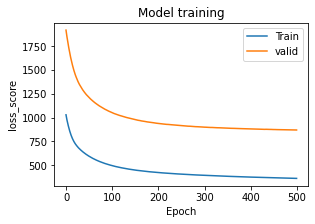

In [268]:
# Plot training & validation acc values
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model training')
plt.ylabel('loss_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper right')
plt.show()

In [269]:
test_predictions = model.predict(test_X)
test_dataset.obsm["predicted_gene"] = test_predictions

Populating the interactive namespace from numpy and matplotlib

ENSMUSG00000031425:


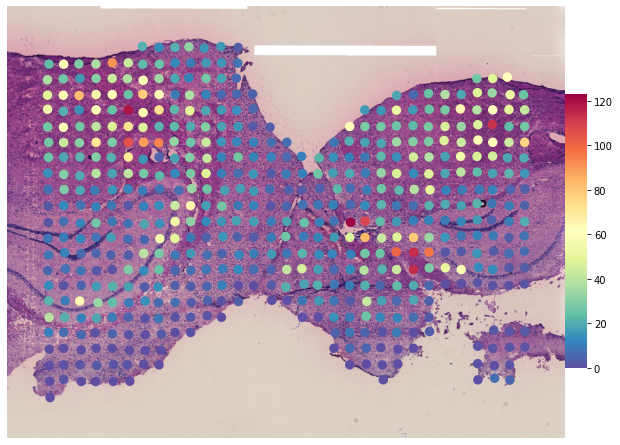


ENSMUSG00000031425:


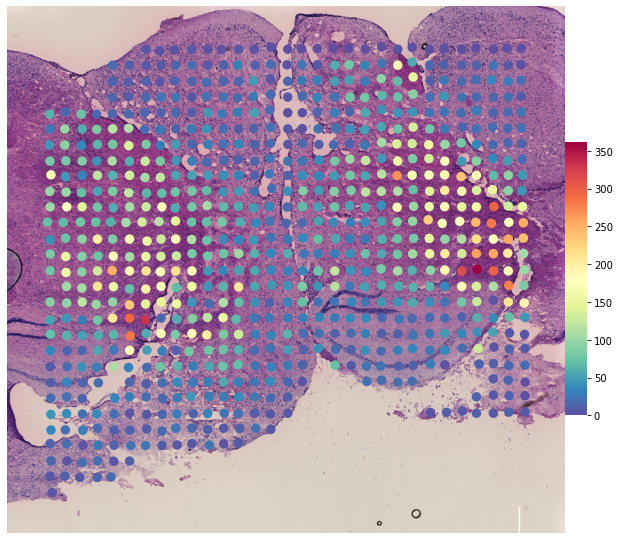

In [270]:
%pylab inline
figsize(10, 10)
for i, library in enumerate(
    ["Sample5", "Sample6"]
):
    ad = test_dataset[test_dataset.obs.library_id == library, :].copy()
    print('\n'+gene+':')
    gene_plot(ad, genes=gene, spot_size=90, library_id=library)

Populating the interactive namespace from numpy and matplotlib

ENSMUSG00000031425:


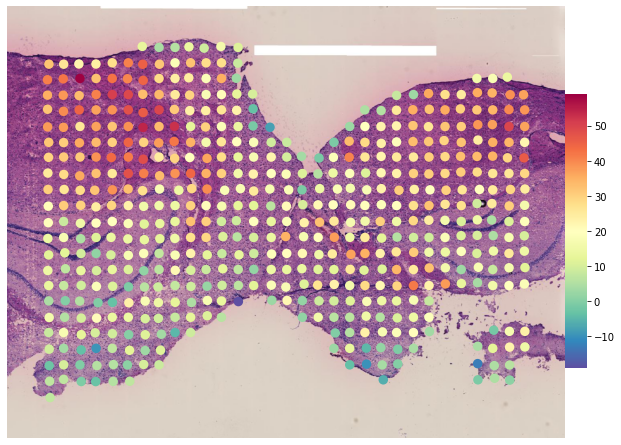


ENSMUSG00000031425:


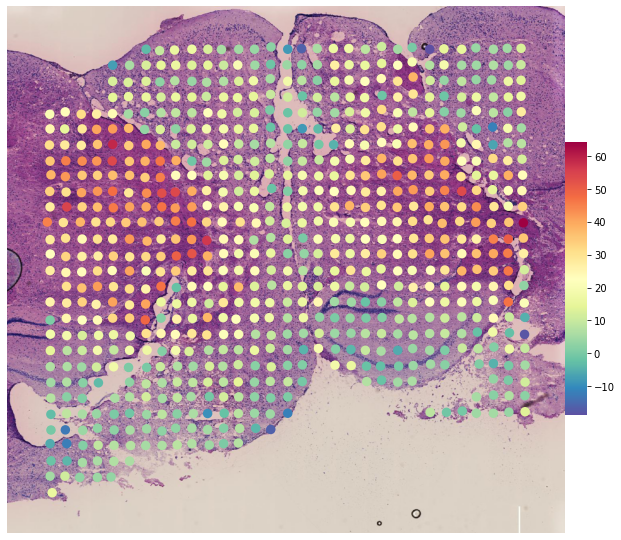

In [271]:
test_dataset_ = test_dataset[:,gene].copy()
test_dataset_.X = test_dataset_.obsm["predicted_gene"]
%pylab inline
figsize(10, 10)
for i, library in enumerate(
    ["Sample5", "Sample6"]
):
    ad = test_dataset_[test_dataset_.obs.library_id == library, :].copy()
    print('\n'+gene+':')
    gene_plot(ad, genes=gene, spot_size=90, library_id=library)

In [243]:
def build_model():
    inputs = Input(shape=(2048,))
    outputs = Dropout(0.6)(inputs)
#     outputs = Dense(512,)(outputs)
#     outputs = Dense(256, activation='relu')(inputs)
#     outputs = Dropout(0.5)(outputs)
    outputs = Dense(2)(outputs)
    distribution_outputs = Lambda(negative_binomial_layer)(outputs)
    
    model = Model(inputs=inputs, outputs=distribution_outputs)

    optimizer = tf.keras.optimizers.RMSprop(0.0001)
#     optimizer = tf.keras.optimizers.Adam()

    model.compile(loss=negative_binomial_loss,
                optimizer=optimizer,
                metrics=[negative_binomial_loss, 'acc'])
    return model

In [244]:
model = build_model()

In [245]:
EPOCHS = 500

history = model.fit(
  train_X, train_Y, batch_size=100,
  epochs=EPOCHS, validation_data = (valid_X, valid_Y), validation_batch_size = 100)

Epoch 1/500
20/20 [==============================] - ETA: 0s - loss: 31.9867 - negative_binomial_loss: 31.98 - ETA: 0s - loss: 24.9466 - negative_binomial_loss: 24.94 - 0s 10ms/step - loss: 24.6628 - negative_binomial_loss: 24.6628 - val_loss: 22.0933 - val_negative_binomial_loss: 22.0933
Epoch 2/500
20/20 [==============================] - ETA: 0s - loss: 12.0398 - negative_binomial_loss: 12.03 - ETA: 0s - loss: 18.3100 - negative_binomial_loss: 18.31 - 0s 5ms/step - loss: 17.9581 - negative_binomial_loss: 17.9581 - val_loss: 15.8968 - val_negative_binomial_loss: 15.8968
Epoch 3/500
20/20 [==============================] - ETA: 0s - loss: 18.8287 - negative_binomial_loss: 18.82 - 0s 4ms/step - loss: 15.4126 - negative_binomial_loss: 15.4126 - val_loss: 11.7700 - val_negative_binomial_loss: 11.7700
Epoch 4/500
20/20 [==============================] - ETA: 0s - loss: 9.8838 - negative_binomial_loss: 9.88 - 0s 4ms/step - loss: 11.3786 - negative_binomial_loss: 11.3786 - val_loss: 9.2598 

Epoch 37/500
20/20 [==============================] - ETA: 0s - loss: 4.8891 - negative_binomial_loss: 4.88 - 0s 3ms/step - loss: 4.4179 - negative_binomial_loss: 4.4179 - val_loss: 4.1670 - val_negative_binomial_loss: 4.1670
Epoch 38/500
20/20 [==============================] - ETA: 0s - loss: 4.4925 - negative_binomial_loss: 4.49 - 0s 4ms/step - loss: 4.3670 - negative_binomial_loss: 4.3670 - val_loss: 4.1692 - val_negative_binomial_loss: 4.1692
Epoch 39/500
20/20 [==============================] - ETA: 0s - loss: 4.7218 - negative_binomial_loss: 4.72 - 0s 3ms/step - loss: 4.3182 - negative_binomial_loss: 4.3182 - val_loss: 4.1569 - val_negative_binomial_loss: 4.1569
Epoch 40/500
20/20 [==============================] - ETA: 0s - loss: 4.3445 - negative_binomial_loss: 4.34 - 0s 4ms/step - loss: 4.3819 - negative_binomial_loss: 4.3819 - val_loss: 4.1554 - val_negative_binomial_loss: 4.1554
Epoch 41/500
20/20 [==============================] - ETA: 0s - loss: 4.4184 - negative_binomial

20/20 [==============================] - ETA: 0s - loss: 4.0944 - negative_binomial_loss: 4.09 - 0s 3ms/step - loss: 4.1053 - negative_binomial_loss: 4.1053 - val_loss: 4.1280 - val_negative_binomial_loss: 4.1280
Epoch 74/500
20/20 [==============================] - ETA: 0s - loss: 4.2392 - negative_binomial_loss: 4.23 - 0s 3ms/step - loss: 4.0826 - negative_binomial_loss: 4.0826 - val_loss: 4.1448 - val_negative_binomial_loss: 4.1448
Epoch 75/500
20/20 [==============================] - ETA: 0s - loss: 4.1883 - negative_binomial_loss: 4.18 - 0s 3ms/step - loss: 4.0887 - negative_binomial_loss: 4.0887 - val_loss: 4.1320 - val_negative_binomial_loss: 4.1320
Epoch 76/500
20/20 [==============================] - ETA: 0s - loss: 4.0970 - negative_binomial_loss: 4.09 - 0s 3ms/step - loss: 4.1219 - negative_binomial_loss: 4.1219 - val_loss: 4.1338 - val_negative_binomial_loss: 4.1338
Epoch 77/500
20/20 [==============================] - ETA: 0s - loss: 3.8013 - negative_binomial_loss: 3.80 -

Epoch 109/500
20/20 [==============================] - ETA: 0s - loss: 4.0188 - negative_binomial_loss: 4.01 - 0s 4ms/step - loss: 4.0374 - negative_binomial_loss: 4.0374 - val_loss: 4.1588 - val_negative_binomial_loss: 4.1588
Epoch 110/500
20/20 [==============================] - ETA: 0s - loss: 4.1584 - negative_binomial_loss: 4.15 - 0s 4ms/step - loss: 4.0424 - negative_binomial_loss: 4.0424 - val_loss: 4.1568 - val_negative_binomial_loss: 4.1568
Epoch 111/500
20/20 [==============================] - ETA: 0s - loss: 4.3798 - negative_binomial_loss: 4.37 - 0s 3ms/step - loss: 4.0253 - negative_binomial_loss: 4.0253 - val_loss: 4.1579 - val_negative_binomial_loss: 4.1579
Epoch 112/500
20/20 [==============================] - ETA: 0s - loss: 3.7574 - negative_binomial_loss: 3.75 - 0s 3ms/step - loss: 4.0187 - negative_binomial_loss: 4.0187 - val_loss: 4.1677 - val_negative_binomial_loss: 4.1677
Epoch 113/500
20/20 [==============================] - ETA: 0s - loss: 3.7428 - negative_bin

20/20 [==============================] - ETA: 0s - loss: 3.9883 - negative_binomial_loss: 3.98 - 0s 3ms/step - loss: 4.0372 - negative_binomial_loss: 4.0372 - val_loss: 4.1862 - val_negative_binomial_loss: 4.1862
Epoch 146/500
20/20 [==============================] - ETA: 0s - loss: 3.9473 - negative_binomial_loss: 3.94 - 0s 3ms/step - loss: 3.9674 - negative_binomial_loss: 3.9674 - val_loss: 4.1837 - val_negative_binomial_loss: 4.1837
Epoch 147/500
20/20 [==============================] - ETA: 0s - loss: 3.9609 - negative_binomial_loss: 3.96 - 0s 3ms/step - loss: 3.9706 - negative_binomial_loss: 3.9706 - val_loss: 4.1785 - val_negative_binomial_loss: 4.1785
Epoch 148/500
20/20 [==============================] - ETA: 0s - loss: 4.0341 - negative_binomial_loss: 4.03 - 0s 3ms/step - loss: 3.9970 - negative_binomial_loss: 3.9970 - val_loss: 4.1886 - val_negative_binomial_loss: 4.1886
Epoch 149/500
20/20 [==============================] - ETA: 0s - loss: 3.9261 - negative_binomial_loss: 3.

20/20 [==============================] - ETA: 0s - loss: 3.8201 - negative_binomial_loss: 3.82 - 0s 3ms/step - loss: 4.0071 - negative_binomial_loss: 4.0071 - val_loss: 4.2087 - val_negative_binomial_loss: 4.2087
Epoch 182/500
20/20 [==============================] - ETA: 0s - loss: 3.8368 - negative_binomial_loss: 3.83 - 0s 3ms/step - loss: 3.9798 - negative_binomial_loss: 3.9798 - val_loss: 4.1933 - val_negative_binomial_loss: 4.1933
Epoch 183/500
20/20 [==============================] - ETA: 0s - loss: 3.7969 - negative_binomial_loss: 3.79 - 0s 4ms/step - loss: 4.0021 - negative_binomial_loss: 4.0021 - val_loss: 4.2225 - val_negative_binomial_loss: 4.2225
Epoch 184/500
20/20 [==============================] - ETA: 0s - loss: 3.7771 - negative_binomial_loss: 3.77 - 0s 3ms/step - loss: 3.9317 - negative_binomial_loss: 3.9317 - val_loss: 4.2578 - val_negative_binomial_loss: 4.2578
Epoch 185/500
20/20 [==============================] - ETA: 0s - loss: 3.8072 - negative_binomial_loss: 3.

20/20 [==============================] - ETA: 0s - loss: 4.0733 - negative_binomial_loss: 4.07 - 0s 4ms/step - loss: 3.9252 - negative_binomial_loss: 3.9252 - val_loss: 4.2457 - val_negative_binomial_loss: 4.2457
Epoch 218/500
20/20 [==============================] - ETA: 0s - loss: 4.0295 - negative_binomial_loss: 4.02 - 0s 3ms/step - loss: 3.9713 - negative_binomial_loss: 3.9713 - val_loss: 4.2387 - val_negative_binomial_loss: 4.2387
Epoch 219/500
20/20 [==============================] - ETA: 0s - loss: 4.0050 - negative_binomial_loss: 4.00 - 0s 3ms/step - loss: 3.9497 - negative_binomial_loss: 3.9497 - val_loss: 4.2225 - val_negative_binomial_loss: 4.2225
Epoch 220/500
20/20 [==============================] - ETA: 0s - loss: 3.7797 - negative_binomial_loss: 3.77 - 0s 3ms/step - loss: 3.9243 - negative_binomial_loss: 3.9243 - val_loss: 4.2440 - val_negative_binomial_loss: 4.2440
Epoch 221/500
20/20 [==============================] - ETA: 0s - loss: 3.9190 - negative_binomial_loss: 3.

20/20 [==============================] - ETA: 0s - loss: 3.9851 - negative_binomial_loss: 3.98 - 0s 3ms/step - loss: 3.9148 - negative_binomial_loss: 3.9148 - val_loss: 4.2416 - val_negative_binomial_loss: 4.2416
Epoch 254/500
20/20 [==============================] - ETA: 0s - loss: 3.8418 - negative_binomial_loss: 3.84 - 0s 3ms/step - loss: 3.8967 - negative_binomial_loss: 3.8967 - val_loss: 4.2532 - val_negative_binomial_loss: 4.2532
Epoch 255/500
20/20 [==============================] - ETA: 0s - loss: 3.9592 - negative_binomial_loss: 3.95 - 0s 3ms/step - loss: 3.9160 - negative_binomial_loss: 3.9160 - val_loss: 4.2639 - val_negative_binomial_loss: 4.2639
Epoch 256/500
20/20 [==============================] - ETA: 0s - loss: 3.6773 - negative_binomial_loss: 3.67 - 0s 3ms/step - loss: 3.8788 - negative_binomial_loss: 3.8788 - val_loss: 4.2684 - val_negative_binomial_loss: 4.2684
Epoch 257/500
20/20 [==============================] - ETA: 0s - loss: 3.5791 - negative_binomial_loss: 3.

20/20 [==============================] - ETA: 0s - loss: 3.7404 - negative_binomial_loss: 3.74 - 0s 3ms/step - loss: 3.8770 - negative_binomial_loss: 3.8770 - val_loss: 4.2906 - val_negative_binomial_loss: 4.2906
Epoch 290/500
20/20 [==============================] - ETA: 0s - loss: 3.9238 - negative_binomial_loss: 3.92 - 0s 3ms/step - loss: 3.9069 - negative_binomial_loss: 3.9069 - val_loss: 4.2868 - val_negative_binomial_loss: 4.2868
Epoch 291/500
20/20 [==============================] - ETA: 0s - loss: 3.6776 - negative_binomial_loss: 3.67 - 0s 3ms/step - loss: 3.8868 - negative_binomial_loss: 3.8868 - val_loss: 4.2724 - val_negative_binomial_loss: 4.2724
Epoch 292/500
20/20 [==============================] - ETA: 0s - loss: 3.8366 - negative_binomial_loss: 3.83 - 0s 3ms/step - loss: 3.9160 - negative_binomial_loss: 3.9160 - val_loss: 4.2884 - val_negative_binomial_loss: 4.2884
Epoch 293/500
20/20 [==============================] - ETA: 0s - loss: 3.8848 - negative_binomial_loss: 3.

20/20 [==============================] - ETA: 0s - loss: 3.9509 - negative_binomial_loss: 3.95 - 0s 3ms/step - loss: 3.8622 - negative_binomial_loss: 3.8622 - val_loss: 4.2988 - val_negative_binomial_loss: 4.2988
Epoch 326/500
20/20 [==============================] - ETA: 0s - loss: 3.8052 - negative_binomial_loss: 3.80 - 0s 3ms/step - loss: 3.8532 - negative_binomial_loss: 3.8532 - val_loss: 4.2861 - val_negative_binomial_loss: 4.2861
Epoch 327/500
20/20 [==============================] - ETA: 0s - loss: 3.8070 - negative_binomial_loss: 3.80 - 0s 4ms/step - loss: 3.8990 - negative_binomial_loss: 3.8990 - val_loss: 4.2836 - val_negative_binomial_loss: 4.2836
Epoch 328/500
20/20 [==============================] - ETA: 0s - loss: 3.8638 - negative_binomial_loss: 3.86 - 0s 4ms/step - loss: 3.8569 - negative_binomial_loss: 3.8569 - val_loss: 4.2844 - val_negative_binomial_loss: 4.2844
Epoch 329/500
20/20 [==============================] - ETA: 0s - loss: 4.1192 - negative_binomial_loss: 4.

20/20 [==============================] - ETA: 0s - loss: 3.9049 - negative_binomial_loss: 3.90 - 0s 3ms/step - loss: 3.8875 - negative_binomial_loss: 3.8875 - val_loss: 4.3358 - val_negative_binomial_loss: 4.3358
Epoch 362/500
20/20 [==============================] - ETA: 0s - loss: 4.0567 - negative_binomial_loss: 4.05 - 0s 3ms/step - loss: 3.8412 - negative_binomial_loss: 3.8412 - val_loss: 4.3070 - val_negative_binomial_loss: 4.3070
Epoch 363/500
20/20 [==============================] - ETA: 0s - loss: 3.7323 - negative_binomial_loss: 3.73 - 0s 4ms/step - loss: 3.8780 - negative_binomial_loss: 3.8780 - val_loss: 4.3223 - val_negative_binomial_loss: 4.3223
Epoch 364/500
20/20 [==============================] - ETA: 0s - loss: 3.9000 - negative_binomial_loss: 3.90 - 0s 5ms/step - loss: 3.8804 - negative_binomial_loss: 3.8804 - val_loss: 4.3279 - val_negative_binomial_loss: 4.3279
Epoch 365/500
20/20 [==============================] - ETA: 0s - loss: 4.0972 - negative_binomial_loss: 4.

20/20 [==============================] - ETA: 0s - loss: 3.9363 - negative_binomial_loss: 3.93 - 0s 3ms/step - loss: 3.8551 - negative_binomial_loss: 3.8551 - val_loss: 4.3180 - val_negative_binomial_loss: 4.3180
Epoch 398/500
20/20 [==============================] - ETA: 0s - loss: 3.7670 - negative_binomial_loss: 3.76 - 0s 3ms/step - loss: 3.8273 - negative_binomial_loss: 3.8273 - val_loss: 4.3145 - val_negative_binomial_loss: 4.3145
Epoch 399/500
20/20 [==============================] - ETA: 0s - loss: 3.6239 - negative_binomial_loss: 3.62 - 0s 3ms/step - loss: 3.8377 - negative_binomial_loss: 3.8377 - val_loss: 4.3408 - val_negative_binomial_loss: 4.3408
Epoch 400/500
20/20 [==============================] - ETA: 0s - loss: 3.7386 - negative_binomial_loss: 3.73 - 0s 3ms/step - loss: 3.8564 - negative_binomial_loss: 3.8564 - val_loss: 4.3024 - val_negative_binomial_loss: 4.3024
Epoch 401/500
20/20 [==============================] - ETA: 0s - loss: 3.6828 - negative_binomial_loss: 3.

20/20 [==============================] - ETA: 0s - loss: 3.8614 - negative_binomial_loss: 3.86 - 0s 3ms/step - loss: 3.8334 - negative_binomial_loss: 3.8334 - val_loss: 4.3472 - val_negative_binomial_loss: 4.3472
Epoch 434/500
20/20 [==============================] - ETA: 0s - loss: 3.8956 - negative_binomial_loss: 3.89 - 0s 3ms/step - loss: 3.8200 - negative_binomial_loss: 3.8200 - val_loss: 4.3289 - val_negative_binomial_loss: 4.3289
Epoch 435/500
20/20 [==============================] - ETA: 0s - loss: 4.1660 - negative_binomial_loss: 4.16 - 0s 3ms/step - loss: 3.8383 - negative_binomial_loss: 3.8383 - val_loss: 4.3182 - val_negative_binomial_loss: 4.3182
Epoch 436/500
20/20 [==============================] - ETA: 0s - loss: 3.7586 - negative_binomial_loss: 3.75 - 0s 3ms/step - loss: 3.8457 - negative_binomial_loss: 3.8457 - val_loss: 4.3177 - val_negative_binomial_loss: 4.3177
Epoch 437/500
20/20 [==============================] - ETA: 0s - loss: 3.6952 - negative_binomial_loss: 3.

20/20 [==============================] - ETA: 0s - loss: 3.9734 - negative_binomial_loss: 3.97 - 0s 3ms/step - loss: 3.8400 - negative_binomial_loss: 3.8400 - val_loss: 4.3629 - val_negative_binomial_loss: 4.3629
Epoch 470/500
20/20 [==============================] - ETA: 0s - loss: 3.8290 - negative_binomial_loss: 3.82 - 0s 3ms/step - loss: 3.8470 - negative_binomial_loss: 3.8470 - val_loss: 4.3557 - val_negative_binomial_loss: 4.3557
Epoch 471/500
20/20 [==============================] - ETA: 0s - loss: 4.0818 - negative_binomial_loss: 4.08 - 0s 3ms/step - loss: 3.8531 - negative_binomial_loss: 3.8531 - val_loss: 4.3287 - val_negative_binomial_loss: 4.3287
Epoch 472/500
20/20 [==============================] - ETA: 0s - loss: 3.6918 - negative_binomial_loss: 3.69 - 0s 3ms/step - loss: 3.8496 - negative_binomial_loss: 3.8496 - val_loss: 4.3453 - val_negative_binomial_loss: 4.3453
Epoch 473/500
20/20 [==============================] - ETA: 0s - loss: 3.9748 - negative_binomial_loss: 3.

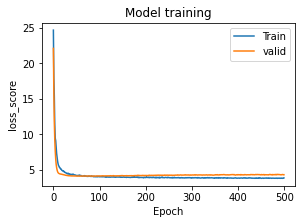

In [246]:
# Plot training & validation acc values
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model training')
plt.ylabel('loss_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper right')
plt.show()

In [247]:
test_predictions = model.predict(test_X)

In [248]:
from scipy.stats import nbinom
n = test_predictions[:,0]; p = test_predictions[:,1]
y_pred = nbinom.mean(n,p)
test_dataset.obsm["predicted_gene"] = y_pred

Populating the interactive namespace from numpy and matplotlib

ENSMUSG00000031425:


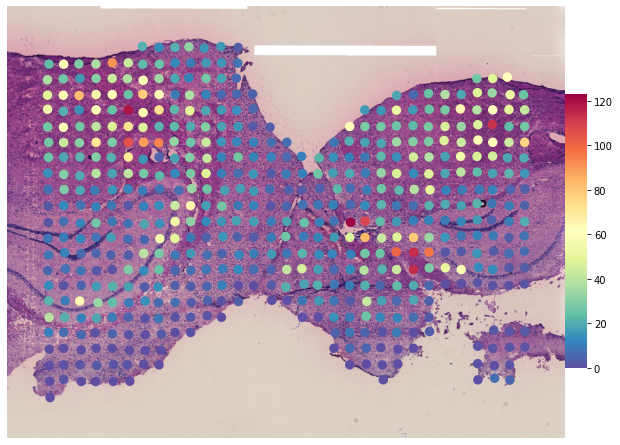


ENSMUSG00000031425:


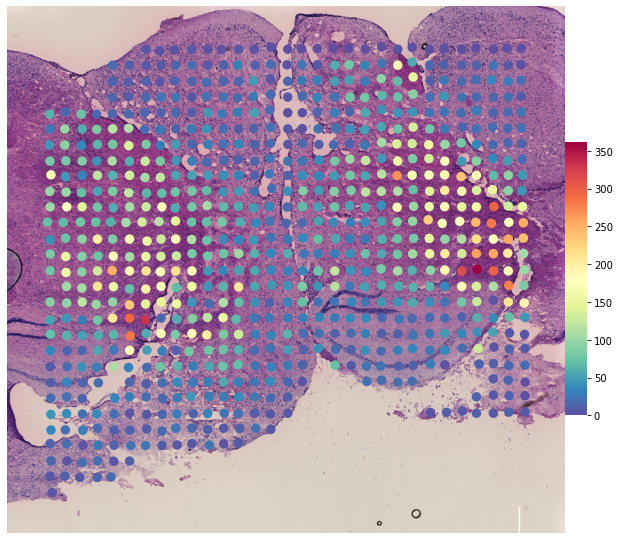

In [249]:
%pylab inline
figsize(10, 10)
for i, library in enumerate(
    ["Sample5", "Sample6"]
):
    ad = test_dataset[test_dataset.obs.library_id == library, :].copy()
    print('\n'+gene+':')
    gene_plot(ad, genes=gene, spot_size=90, library_id=library)

In [250]:
test_dataset_ = test_dataset[:,gene].copy()
test_dataset_.X = test_dataset_.obsm["predicted_gene"]

Populating the interactive namespace from numpy and matplotlib

ENSMUSG00000031425:


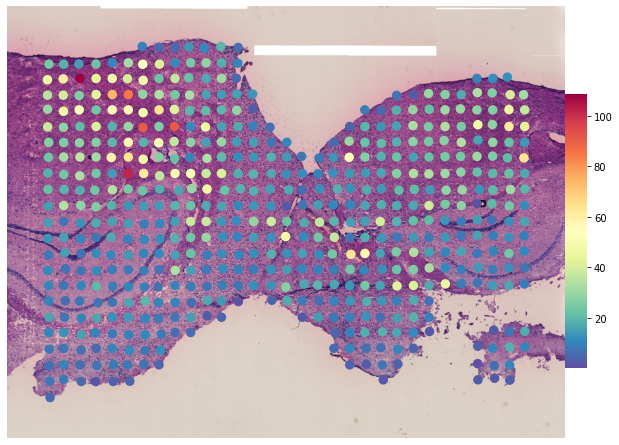


ENSMUSG00000031425:


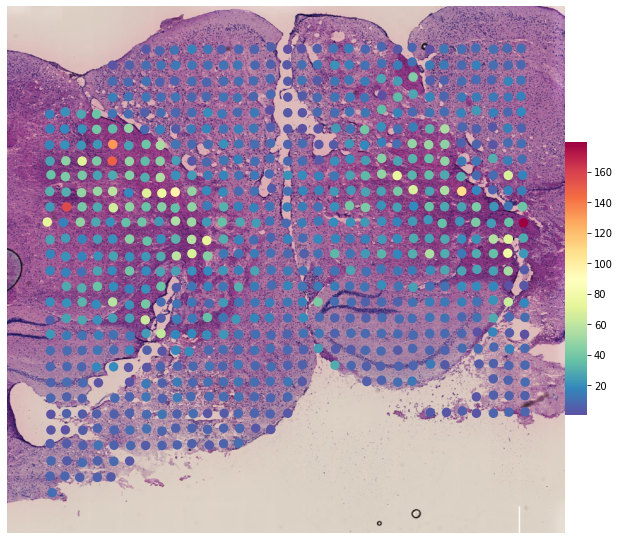

In [251]:
%pylab inline
figsize(10, 10)
for i, library in enumerate(
    ["Sample5", "Sample6"]
):
    ad = test_dataset_[test_dataset_.obs.library_id == library, :].copy()
    print('\n'+gene+':')
    gene_plot(ad, genes=gene, spot_size=90, library_id=library)